In [ ]:
!pip install bitsandbytes
!pip install hf_transfer
!pip install datasets
!pip install trl
!pip install --upgrade datasets
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl transformers
!pip install --no-deps cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
!pip install --no-deps unsloth
!pip install --quiet matplotlib bitsandbytes datasets git+https://github.com/huggingface/transformers.git@main git+https://github.com/huggingface/peft.git@main git+https://github.com/lvwerra/trl.git@main

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

/usr/local/lib/python3.11/dist-packages/transformers/quantizers/auto.py:207: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


Map:   0%|          | 0/21029 [00:00<?, ? examples/s]

Filter:   0%|          | 0/21029 [00:00<?, ? examples/s]

 Sample 0 input_ids[:20]: [128000, 10174, 7282, 27916, 3639, 527, 1063, 10631, 369, 6968, 264, 6992, 2626, 3197, 5380, 27, 6465, 27916, 720, 16]
 Sample 1 input_ids[:20]: [128000, 10174, 7282, 27916, 61885, 279, 3813, 1405, 499, 1505, 6261, 304, 264, 95863, 6237, 4871, 315, 264, 42108, 6301]

[INFO] VRAM usage before training:
Allocated: 1118.92 MB, Max: 2169.59 MB


Truncating train dataset:   0%|          | 0/21029 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


[INFO] Training run...



<ipython-input-1-b263fce14ed3>:360: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(inputs["input_ids"], dtype=torch.long, device=device)
<ipython-input-1-b263fce14ed3>:361: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels    = torch.tensor(inputs["labels"],    dtype=torch.long, device=device)
<ipython-input-1-b263fce14ed3>:362: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attn_mask = torch.tensor(inputs["attention_mask"], dtype=torch.long, device=device)
W0302 17:28:09.847000 95988 torch/_inductor/debug.py:434

Step,Training Loss
1,3.302900
2,5.265800
3,6.042800
4,6.752300
5,4.762500
6,5.865800
7,4.770200
8,3.353400
9,4.470300
10,5.464900


[INFO] Training done. Elapsed: 14.77s
[INFO] VRAM usage after training:
Allocated: 1316.31 MB, Max: 2458.33 MB

=== Dynamo Graph Break Report ===
No graph breaks recorded. ✓
Total graph breaks: 0

=== Dynamo Recompile Report ===
No recompiles recorded. ✓
Total recompiles: 0
[OK] total recompiles=0. ✓


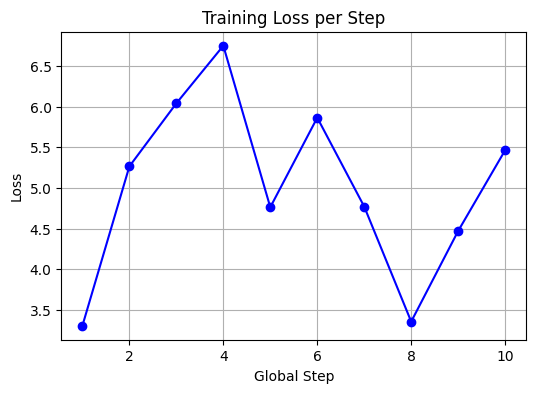

In [1]:
#!/usr/bin/env python3
# coding: utf-8

##############################################################################
# 0) Install bitsandbytes if needed
##############################################################################
import sys
import subprocess

def install_bnb_if_needed():
    try:
        import importlib
        importlib.util.find_spec("bitsandbytes")
    except ImportError:
        print("[INFO] bitsandbytes not found. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "bitsandbytes"])

install_bnb_if_needed()
import bitsandbytes as bnb

##############################################################################
# 1) Standard Imports & Setup
##############################################################################
import os
import time
import math
import logging
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import torch._dynamo as dynamo
from torch._dynamo.utils import counters
dynamo.reset()  # reset counters

##############################################################################
# 2) TorchDynamo/TorchInductor environment & logging config
##############################################################################
import torch._logging
torch._logging.set_logs(
    dynamo=logging.WARN,
    inductor=logging.WARN,
    graph_breaks=True,
    recompiles=True,
    recompiles_verbose=True,
    compiled_autograd_verbose=True,
)
import torch._inductor
torch._inductor.config.debug = True

torch._dynamo.config.verbose = True
torch._dynamo.config.suppress_errors = False
torch._dynamo.config.cache_size_limit = 512

os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = (
    "expandable_segments:True,"
    "roundup_power2_divisions:[32:256,64:128,256:64,>:32]"
)

##############################################################################
# 3) Load 4-bit Model in EAGER Mode (no patches yet) & Inspect
##############################################################################
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_name = "unsloth/Llama-3.2-1B-Instruct-bnb-4bit"
torch.set_default_dtype(torch.float16)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
)

#print("[INFO] Loading model in EAGER mode for shape debugging...")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    attn_implementation="sdpa",
    quantization_config=bnb_config,
)

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.padding_side = "right"

#print("[DEBUG] Inspecting all 4-bit linear layers for weird shapes:")
for name, module in model.named_modules():
    if isinstance(module, bnb.nn.Linear4bit):
        w_shape = tuple(module.weight.shape)
        num_els = module.weight.numel()
        #print(f"  name={name}, shape={w_shape}, #elements={num_els}")

##############################################################################
# 4) (Optional) Attempting to unify shapes
##############################################################################
import bitsandbytes.functional as bnbF

def unify_4bit_weight(weight_tensor, old_shape, new_out, new_in):
    """
    Attempts to:
     1) dequantize => float
     2) reshape => (new_out,new_in)
     3) re-quantize => updated quant_state
    If mismatch, skip.
    """
    float_data = bnbF.dequantize_4bit(weight_tensor.data, weight_tensor.quant_state).float()
    expected_size = new_out * new_in
    if float_data.numel() != expected_size:
        #print(f"[WARN unify_4bit_weight] Attempting reshape from {float_data.shape} => ({new_out}x{new_in}),"
         #     f" but numel mismatch! old={float_data.numel()} vs new={expected_size}. Skipping.")
        return weight_tensor
    float_data = float_data.view(new_out, new_in)
    q_weight, q_state = bnbF.quantize_4bit(float_data, quant_type="nf4")
    weight_tensor.data = q_weight
    weight_tensor.quant_state = q_state
    #print(f"[DEBUG unify_4bit_weight] Re-quantized from {old_shape} => ({new_out}x{new_in}).")
    return weight_tensor

def unify_all_4bit_shapes(m):
    #print("\n[INFO] Attempt unify step: from (X,1) => factoring out 2048 if possible.")
    for name, module in m.named_modules():
        if isinstance(module, bnb.nn.Linear4bit):
            w = module.weight
            old_shape = tuple(w.shape)
            # For example, if shape=(2097152,1), that's 2,097,152 elements => 1024 * 2048
            # If shape=(8388608,1), that's 8,388,608 => 4096 * 2048, etc.
            # We'll do a small factor check:
            e = w.numel()
            if old_shape[1] == 1 and e % 2048 == 0:
                new_out = e // 2048
                new_in  = 2048
                w = unify_4bit_weight(w, old_shape, new_out, new_in)
    return m

model = unify_all_4bit_shapes(model)

#print("\n[DEBUG] Post unify re-check of 4-bit shapes:")
for name, module in model.named_modules():
    if isinstance(module, bnb.nn.Linear4bit):
        w_shape = tuple(module.weight.shape)
        #print(f"  name={name}, shape={w_shape}")

##############################################################################
# 5) Add LoRA & Freeze
##############################################################################
from peft import get_peft_model, LoraConfig, TaskType

lora_config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=["q_proj","k_proj","v_proj","o_proj","gate_proj","up_proj","down_proj"],
    lora_dropout=0,
    bias="none",
    task_type=TaskType.CAUSAL_LM,
)
model = get_peft_model(model, lora_config)

with torch.no_grad():
    for name, param in model.named_parameters():
        if ".lora_A." in name or ".lora_B." in name:
            param.requires_grad_(True)
        else:
            param.requires_grad_(False)

model.enable_input_require_grads()

##############################################################################
# 6) Partial Compilation Patches (MLP, RMSNorm, Attention, CE Loss)
##############################################################################
import transformers.models.llama.modeling_llama as llama
import torch.nn.functional as F

# --- MLP Patch ---
class CompiledActivation(nn.Module):
    def __init__(self, act_fn):
        super().__init__()
        self.act_fn = act_fn
    def forward(self, x):
        if x.dtype != torch.float16:
            x = x.half()
        return self.act_fn(x)

orig_llama_mlp_init = llama.LlamaMLP.__init__
def patched_llama_mlp_init(self, config):
    orig_llama_mlp_init(self, config)
    self.compiled_act = torch.compile(
        CompiledActivation(self.act_fn),
        fullgraph=True, dynamic=True,
        options={
            "epilogue_fusion": True,
            "max_autotune": True,
            "shape_padding": True,
            "trace.enabled": True,
            "triton.cudagraphs": False,
        },
    )
    def partial_forward_mlp(_self, x, **kw):
        if x.dtype != torch.float16:
            x = x.half()
        gate_out = _self.gate_proj(x)  # 4-bit lines in eager
        up_out   = _self.up_proj(x)
        activated = _self.compiled_act(gate_out)
        return _self.down_proj(activated * up_out)
    self.forward = partial_forward_mlp.__get__(self, llama.LlamaMLP)

llama.LlamaMLP.__init__ = patched_llama_mlp_init

# --- RMSNorm Patch ---
@torch.compile(fullgraph=True, dynamic=True, options={
    "epilogue_fusion": True,
    "max_autotune": True,
    "shape_padding": True,
    "trace.enabled": True,
    "triton.cudagraphs": False,
})
def compiled_rmsnorm_forward(rmsnorm_module, hidden_states):
    if hidden_states.dtype != torch.float16:
        hidden_states = hidden_states.half()
    variance = hidden_states.pow(2).mean(-1, keepdim=True)
    normed   = hidden_states * torch.rsqrt(variance + rmsnorm_module.variance_epsilon)
    return normed * rmsnorm_module.weight

orig_rmsnorm_forward = llama.LlamaRMSNorm.forward
def new_rmsnorm_forward(self, hidden_states, **kw):
    return compiled_rmsnorm_forward(self, hidden_states)

llama.LlamaRMSNorm.forward = new_rmsnorm_forward

# --- Attention Patch (matmul/softmax) ---
class CompiledAttentionCore(nn.Module):
    def forward(self, q, k, v, mask=None):
        w = torch.matmul(q, k.transpose(2,3))
        if mask is not None:
            w += mask
        w = F.softmax(w, dim=-1, dtype=torch.float16)
        out = torch.matmul(w, v)
        out = out.transpose(1,2).contiguous()
        return out

CompiledAttentionCore = torch.compile(
    CompiledAttentionCore,
    fullgraph=True, dynamic=True,
    options={
        "epilogue_fusion": True,
        "max_autotune": True,
        "shape_padding": True,
        "trace.enabled": True,
        "triton.cudagraphs": False,
    },
)

orig_llama_attn_init = llama.LlamaAttention.__init__
def patched_llama_attn_init(self, config, layer_idx=None):
    orig_llama_attn_init(self, config, layer_idx=layer_idx)
    self.compiled_core = CompiledAttentionCore()
    def partial_forward_attn(_self, hidden_states, attention_mask=None, **kw):
        if hidden_states.dtype != torch.float16:
            hidden_states = hidden_states.half()
        # 4-bit lines in eager
        q = _self.q_proj(hidden_states)
        k = _self.k_proj(hidden_states)
        v = _self.v_proj(hidden_states)
        bsz, seq_len, dim_q = q.shape

        # minimal factor logic for heads
        suggested_heads = getattr(config, "num_attention_heads", 8)
        def best_factor(n, max_h=suggested_heads):
            for h in range(max_h, 0, -1):
                if n % h == 0:
                    return h
            return 1
        heads   = best_factor(dim_q, suggested_heads)
        head_dim= dim_q // heads

        q = q.view(bsz, seq_len, heads, head_dim).transpose(1,2) / math.sqrt(head_dim)
        k = k.view(bsz, seq_len, heads, head_dim).transpose(1,2)
        v = v.view(bsz, seq_len, heads, head_dim).transpose(1,2)

        out = _self.compiled_core(q, k, v, attention_mask)
        return _self.o_proj(out.view(bsz, seq_len, heads * head_dim))
    self.forward = partial_forward_attn.__get__(self, llama.LlamaAttention)

llama.LlamaAttention.__init__ = patched_llama_attn_init

# --- Cross-Entropy Loss compiled
loss_fct = nn.CrossEntropyLoss()

@torch.compile(fullgraph=True, dynamic=True, options={
    "epilogue_fusion": True,
    "max_autotune": True,
    "shape_padding": True,
    "trace.enabled": True,
    "triton.cudagraphs": False,
})
def compiled_loss_fn(logits, labels):
    shift_logits = logits[..., :-1, :].contiguous().float()
    shift_labels = labels[..., 1:].contiguous()
    return loss_fct(
        shift_logits.view(-1, shift_logits.size(-1)),
        shift_labels.view(-1)
    )

##############################################################################
# 7) Prepare Dataset
##############################################################################
from datasets import load_dataset
url = "https://huggingface.co/datasets/laion/OIG/resolve/main/unified_chip2.jsonl"
#print("[INFO] Loading LAION OIG (10%) for demonstration.")
dataset = load_dataset("json", data_files={"train": url}, split="train[:10%]")

max_seq_length = 256
#print(f"[INFO] Padding/truncating to {max_seq_length} ...")

def pad_tokenize(ex):
    txt = ex["text"] if "text" in ex else str(ex)
    toks = tokenizer(txt, max_length=max_seq_length, padding="max_length", truncation=True, return_tensors="pt")
    ids = toks["input_ids"][0].tolist()
    # clamp out-of-range
    vocab_sz = model.config.vocab_size
    ids = [t if t < vocab_sz else tokenizer.unk_token_id for t in ids]
    ex["input_ids"] = ids
    ex["attention_mask"] = toks["attention_mask"][0].tolist()
    ex["labels"] = ids
    return ex

dataset = dataset.map(pad_tokenize, batched=False)

def is_not_too_short(ex):
    return sum(1 for t in ex["input_ids"] if t != tokenizer.pad_token_id) >= 5

dataset = dataset.filter(is_not_too_short)
#print(f"[INFO] dataset len after filter: {len(dataset)}")

#print("\n[DEBUG] Checking first sample or two:")
for i in range(min(2,len(dataset))):
    print(f" Sample {i} input_ids[:20]:", dataset[i]["input_ids"][:20])

##############################################################################
# 8) Single-Pass Sanity Check
##############################################################################
#print("[INFO] Single forward pass sanity check with partial compile:")
#with torch.no_grad():
#    sample_txt = "Hello, this is a test for zero-loss debugging."
#    sample_in = tokenizer(sample_txt, return_tensors="pt", max_length=64, truncation=True).to(model.device)
#    out = model(**sample_in)
#    print("[DEBUG] logits shape:", out.logits.shape)
#    test_loss = compiled_loss_fn(out.logits, sample_in["input_ids"])
#    print("[DEBUG] single example loss:", test_loss.item())

##############################################################################
# 9) Trainer
##############################################################################
from trl import SFTTrainer, SFTConfig

class CompiledLossSFTTrainer(SFTTrainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kw):
        device = model.device
        input_ids = torch.tensor(inputs["input_ids"], dtype=torch.long, device=device)
        labels    = torch.tensor(inputs["labels"],    dtype=torch.long, device=device)
        attn_mask = torch.tensor(inputs["attention_mask"], dtype=torch.long, device=device)
        outputs = model(input_ids=input_ids, attention_mask=attn_mask, labels=labels)
        loss = compiled_loss_fn(outputs.logits, labels)
        #print(f"[DEBUG] step loss={loss.item():.6f}")
        return (loss, outputs) if return_outputs else loss

trainer_config = SFTConfig(
    per_device_train_batch_size=1,
    gradient_accumulation_steps=2,
    warmup_steps=1,
    max_steps=10,
    logging_steps=1,
    output_dir="outputs",
    seed=3407,
    max_seq_length=max_seq_length,
    fp16=True,
    bf16=False,
    report_to="none",
    dataset_num_proc=1,
    learning_rate=2e-5,
)

print(f"\n[INFO] VRAM usage before training:")
print(f"Allocated: {torch.cuda.memory_allocated()/1e6:.2f} MB, Max: {torch.cuda.max_memory_allocated()/1e6:.2f} MB")

trainer = CompiledLossSFTTrainer(
    model=model,
    train_dataset=dataset,
    processing_class=None,
    args=trainer_config,
)

print("[INFO] Training run...\n")
start = time.time()
trainer.train()
end = time.time()

print(f"[INFO] Training done. Elapsed: {end - start:.2f}s")
print("[INFO] VRAM usage after training:")
print(f"Allocated: {torch.cuda.memory_allocated()/1e6:.2f} MB, Max: {torch.cuda.max_memory_allocated()/1e6:.2f} MB")

##############################################################################
# 10) Graph Break / Recompile Report
##############################################################################
print("")
gb_data = counters["graph_break"]
gb_total= sum(gb_data.values())
print("=== Dynamo Graph Break Report ===")
if not gb_data:
    print("No graph breaks recorded. ✓")
else:
    print("Detailed counts by reason:")
    for r,c in gb_data.items():
        print(f"  {r}: {c}")
print(f"Total graph breaks: {gb_total}")

rc_data = counters["recompiles"]
rc_total= sum(rc_data.values())
print("\n=== Dynamo Recompile Report ===")
if not rc_data:
    print("No recompiles recorded. ✓")
else:
    print("Recompile triggers by reason:")
    for r,c in rc_data.items():
        print(f"  {r}: {c}")
print(f"Total recompiles: {rc_total}")

if rc_total>30:
    print("[WARN] total recompiles>30, investigate shape/dtype changes!")
elif rc_total>10:
    print(f"[INFO] total recompiles={rc_total}, ideally <10 but <30 acceptable.")
else:
    print(f"[OK] total recompiles={rc_total}. ✓")

##############################################################################
# 11) Plot training loss
##############################################################################
losses = []
steps  = []
for e in trainer.state.log_history:
    if "loss" in e and "step" in e:
        losses.append(e["loss"])
        steps.append(e["step"])

if losses:
    plt.figure(figsize=(6,4))
    plt.plot(steps, losses, "o-", color="blue")
    plt.title("Training Loss per Step")
    plt.xlabel("Global Step")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()
else:
    print("[INFO] No training-loss logs found to plot.")
